# Data Visualisation 3 - Box and Whiskers Plots

In this notebook I demonstrate how to create boxplots to allow the scores on a variable to visualise the distribution of and differences between groups or categories on some scale outcome variable. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
var_cols = ["programme", "grade", "outcome"]

df_1 = pd.read_csv("results_psy4050_22_23_v2.csv", usecols = var_cols)

df_1.head()

,programme,grade,outcome
0,p_t_i,74.0,pass
1,p_t_i,17.0,fail
2,applied_psychology,20.0,fail
3,clin_health_psy,63.0,pass
4,clin_health_psy,79.0,pass


In [3]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   programme  64 non-null     object 
 1   grade      61 non-null     float64
 2   outcome    64 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [4]:
df_1.isna().sum()

programme    0
grade        3
outcome      0
dtype: int64

In [5]:
df_2 = df_1.dropna()

In [6]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 0 to 63
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   programme  61 non-null     object 
 1   grade      61 non-null     float64
 2   outcome    61 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [7]:
applied_psych = df_2.loc[df_2.programme == "applied_psychology"]["grade"]
clin_health = df_2.loc[df_2.programme == "clin_health_psy"]["grade"]
cog_neuro = df_2.loc[df_2.programme == "cog_clin_neuro"]["grade"]
dev_psych = df_2.loc[df_2.programme == "dev_psych"]["grade"]
pti = df_2.loc[df_2.programme == "p_t_i"]["grade"]

{'whiskers': [<matplotlib.lines.Line2D at 0x23922877a90>,
 'caps': [<matplotlib.lines.Line2D at 0x2392288e070>,
 'boxes': [<matplotlib.lines.Line2D at 0x239228777c0>,
 'medians': [<matplotlib.lines.Line2D at 0x2392288e610>,
 'fliers': [<matplotlib.lines.Line2D at 0x2392288e8e0>,
 'means': []}

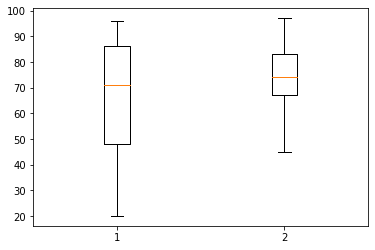

In [8]:
# Creating a box and whiskers plot for these two groups:
plt.boxplot([applied_psych, cog_neuro])

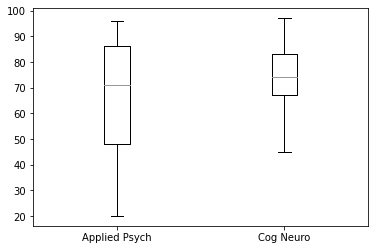

In [9]:
labels = ['Applied Psych', 'Cog Neuro']

plt.boxplot([applied_psych, cog_neuro], labels = labels)

plt.show()

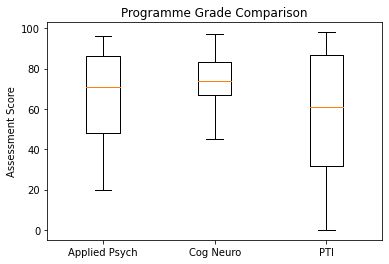

In [10]:
labels = ['Applied Psych', 'Cog Neuro', 'PTI']

plt.boxplot([applied_psych, cog_neuro, pti], labels = labels)

plt.title('Programme Grade Comparison')
plt.ylabel('Assessment Score')

plt.show()

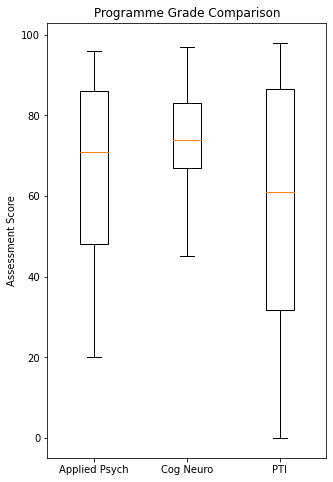

In [11]:
# Here we can change the fig size to make the y axis larger than the x:
plt.figure(figsize = (5, 8))

applied_psych = df_2.loc[df_2.programme == "applied_psychology"]["grade"]
cog_neuro = df_2.loc[df_2.programme == "cog_clin_neuro"]["grade"]
pti = df_2.loc[df_2.programme == "p_t_i"]["grade"]

labels = ['Applied Psych', 'Cog Neuro', 'PTI']

plt.boxplot([applied_psych, cog_neuro, pti], labels = labels)

plt.title('Programme Grade Comparison')
plt.ylabel('Assessment Score')

plt.show()

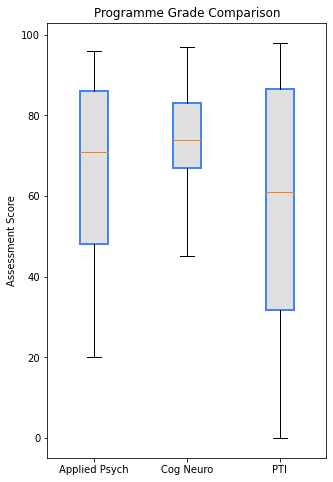

In [12]:
# Adding some different style elements to the different boxes (such as bold lines and colours):
plt.figure(figsize = (5, 8))

applied_psych = df_2.loc[df_2.programme == "applied_psychology"]["grade"]
cog_neuro = df_2.loc[df_2.programme == "cog_clin_neuro"]["grade"]
pti = df_2.loc[df_2.programme == "p_t_i"]["grade"]

labels = ['Applied Psych', 'Cog Neuro', 'PTI']

boxes = plt.boxplot([applied_psych, cog_neuro, pti], labels = labels, patch_artist = True) # Saving the plot as an object and
# setting patch artist to true (otherwise it doesn't recognise facecolor)

for box in boxes['boxes']: 
    box.set(color = '#4286f4', linewidth = 2) # Using a for loop to set edge colour and line width.
    box.set(facecolor = '#e0e0e0') # Here setting the face colour but have to add a patch artist parameter to the boxes plot.

plt.title('Programme Grade Comparison')
plt.ylabel('Assessment Score')

plt.show()


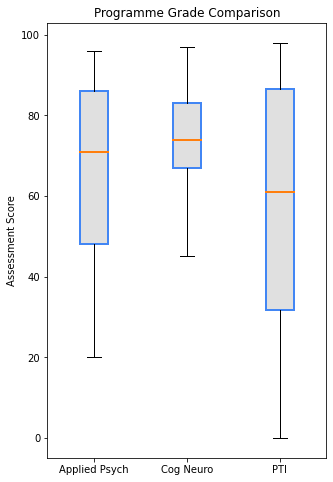

In [13]:
# Last thing, changing the median lines:

# Adding some different style elements to the different boxes (such as bold lines and colours):
plt.figure(figsize = (5, 8))

applied_psych = df_2.loc[df_2.programme == "applied_psychology"]["grade"]
cog_neuro = df_2.loc[df_2.programme == "cog_clin_neuro"]["grade"]
pti = df_2.loc[df_2.programme == "p_t_i"]["grade"]

labels = ['Applied Psych', 'Cog Neuro', 'PTI']

boxes = plt.boxplot([applied_psych, cog_neuro, pti], labels = labels, patch_artist = True, medianprops = {'linewidth': 2}) 
# Adding a median properties argument and a dictionary setting linewidth the same as the edge width.

for box in boxes['boxes']: 
    box.set(color = '#4286f4', linewidth = 2) 
    box.set(facecolor = '#e0e0e0') 

plt.title('Programme Grade Comparison')
plt.ylabel('Assessment Score')

plt.show()


In [14]:
pti.describe()

count    20.000000
mean     57.250000
std      31.009124
min       0.000000
25%      31.750000
50%      61.000000
75%      86.500000
max      98.000000
Name: grade, dtype: float64

## Boxplots in seaborn

In [15]:
titan = pd.read_csv('titanic.csv')

In [16]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

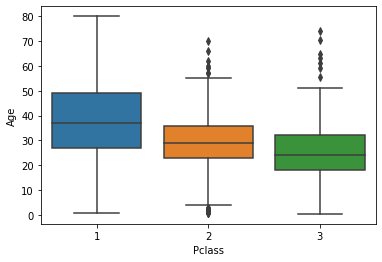

In [18]:
sns.boxplot(data=titan, x="Pclass", y="Age")

In [19]:
titan['alive'] = titan['Survived'].map({0: 'Dead', 1: 'Alive'})

In [20]:
titan.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,alive
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Dead
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Alive
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Alive
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Alive
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Dead


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

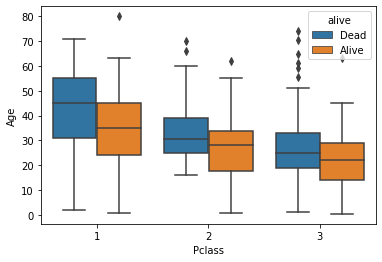

In [21]:
sns.boxplot(data=titan, x="Pclass", y="Age", hue = 'alive')

<AxesSubplot:xlabel='alive', ylabel='Fare'>

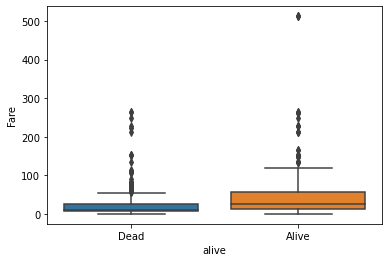

In [22]:
sns.boxplot(data=titan, x="alive", y="Fare")

<AxesSubplot:xlabel='alive', ylabel='Fare'>

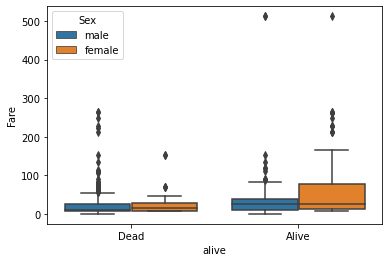

In [23]:
sns.boxplot(data=titan, x="alive", y="Fare", hue = "Sex")

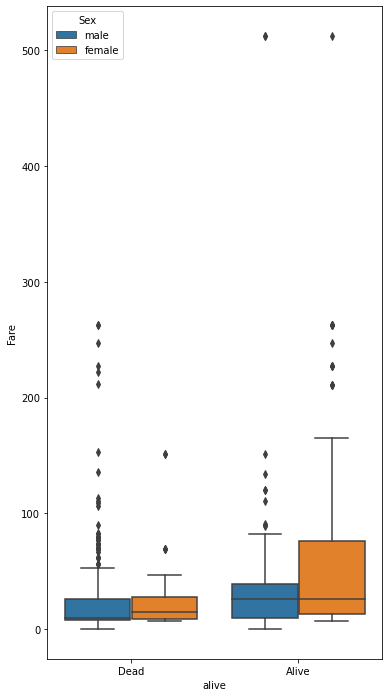

In [24]:
plt.figure(figsize = (6,12))
ax = sns.boxplot(data=titan, x="alive", y="Fare", hue = "Sex")